<a href="https://colab.research.google.com/github/Prasadchaskar/Skin-Disease/blob/main/Skindisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import zipfile
# !unzip /content/drive/MyDrive/archive.zip

In [17]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from pprint import pprint
import cv2
import numpy as np

In [3]:
import pathlib
from pathlib import Path
my_path = Path(r'/content/Skin disease/Train ')

In [10]:
glioma_tumors = list(my_path.glob('Infectious erythema /*'))
glioma_tumors[:5]

[PosixPath('/content/Skin disease/Train /Infectious erythema /70.JPG'),
 PosixPath('/content/Skin disease/Train /Infectious erythema /57.jpg'),
 PosixPath('/content/Skin disease/Train /Infectious erythema /43.jpg'),
 PosixPath('/content/Skin disease/Train /Infectious erythema /98.JPG'),
 PosixPath('/content/Skin disease/Train /Infectious erythema /47.JPG')]

In [13]:
skin_images_dict = {
    'Chickenpox': list(my_path.glob('Chickenpox /*')),
    'Impetigo': list(my_path.glob('Impetigo /*')),
    'Infectious erythema': list(my_path.glob('Infectious erythema /*')),
    'Scabies': list(my_path.glob('Scabies /*')),
    'Skin warts': list(my_path.glob('Skin warts /*'))
}
skin_labels_dict = {
    'Chickenpox': 0,
    'Impetigo': 1,
    'Infectious erythema': 2,
    'Scabies': 3,
    'Skin warts':4
}

In [14]:
X = []
y = []
for tumor_name,images in skin_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resize = cv2.resize(img,(200,200))
        X.append(resize)
        y.append(skin_labels_dict[tumor_name])

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
X_scaled = X/255

In [24]:
from tensorflow.keras import  models,layers
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(4, 4),
                  activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),
                  activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(filters=124, kernel_size=(3, 3),
                  activation='relu'),
    # layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(270,activation='relu'),
    layers.Dense(5,activation='softmax')
]
)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
model.fit(X_scaled,y,epochs=20)

Epoch 1/20
11/11 [==============================] - 1s 130ms/step - loss: 1.4159 - accuracy: 0.4057
Epoch 2/20
11/11 [==============================] - 1s 122ms/step - loss: 1.2436 - accuracy: 0.4686
Epoch 3/20
11/11 [==============================] - 1s 121ms/step - loss: 1.1840 - accuracy: 0.4914
Epoch 4/20
11/11 [==============================] - 1s 120ms/step - loss: 0.9372 - accuracy: 0.6200
Epoch 5/20
11/11 [==============================] - 1s 121ms/step - loss: 0.7951 - accuracy: 0.6943
Epoch 6/20
11/11 [==============================] - 1s 120ms/step - loss: 0.6351 - accuracy: 0.7657
Epoch 7/20
11/11 [==============================] - 1s 120ms/step - loss: 0.6398 - accuracy: 0.7943
Epoch 8/20
11/11 [==============================] - 1s 121ms/step - loss: 0.8564 - accuracy: 0.6886
Epoch 9/20
11/11 [==============================] - 1s 122ms/step - loss: 0.5727 - accuracy: 0.7714
Epoch 10/20
11/11 [==============================] - 1s 121ms/step - loss: 0.5105 - accuracy: 0.8429

In [27]:
test_path = Path(r'/content/Skin disease/Test ')

In [28]:
test_images_dict = {
    'Chickenpox': list(test_path.glob('Chickenpox/*')),
    'Impetigo': list(test_path.glob('Impetigo/*')),
    'Infectious erythema': list(test_path.glob('Infectious erythema/*')),
    'Scabies': list(test_path.glob('Scabies/*')),
    'Skin warts': list(test_path.glob('Skin warts/*'))
}

In [29]:
X_test = []
y_test = []

for tumor_name,images in skin_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resize = cv2.resize(img,(200,200))
        X_test.append(resize)
        y_test.append(skin_labels_dict[tumor_name])

In [30]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [31]:
X_test_scaled = X_test/255

In [34]:
model.evaluate(X_test_scaled,y_test)

11/11 [==============================] - 0s 36ms/step - loss: 0.2496 - accuracy: 0.9486


[0.24962306022644043, 0.9485714435577393]

In [35]:
y_pred = list()
for i in model.predict(X_test_scaled):
  y_pred.append(np.argmax(i))
y_pred = np.array(y_pred)

Class 0 : Chickenpox
Class 1 : Impetigo
Class 2 : Infectious erythema
Class 3 : Scabies
Class 4 : Skin warts

In [36]:
from sklearn.metrics import  classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95        70
           1       1.00      0.97      0.99        70
           2       0.97      0.91      0.94        70
           3       0.90      0.99      0.94        70
           4       0.98      0.89      0.93        70

    accuracy                           0.95       350
   macro avg       0.95      0.95      0.95       350
weighted avg       0.95      0.95      0.95       350



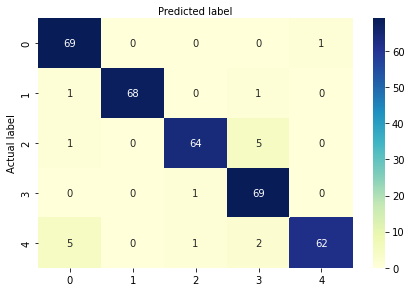

In [39]:
import seaborn as sns
import pandas as pd
class_names = [0,1,2,3,4]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
                fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()